In [21]:
from fastai.vision import *
from fastai.metrics import error_rate
import os

Copying Data set from my Kaggle repo to temporary so that I can have write acess to the dataset.

In [22]:
cp -r /kaggle/input/fruits/fruits-360_dataset/ /tmp

Deleting the Vegetable folders from the dataset.

In [23]:
import shutil
i=0
vegetables=['Apple Braeburn', 'Grape White 2', 'Apple Red Yellow 1', 'Grape White 3', 'Apple Red Yellow 2', 'Grape White 4']
for dirname, _, filenames in os.walk('/tmp/fruits-360_dataset/fruits-360/Training/'): 
    if dirname.split("/")[-1] in vegetables :
        print (dirname)
        shutil.rmtree(dirname)
for dirname, _, filenames in os.walk('/tmp/fruits-360_dataset/fruits-360/Test/'): 
    if dirname.split("/")[-1] in vegetables :
        print (dirname)
        shutil.rmtree(dirname)
shutil.rmtree('/tmp/fruits-360_dataset/fruits-360/test-multiple_fruits')

/tmp/fruits-360_dataset/fruits-360/Training/Apple Braeburn
/tmp/fruits-360_dataset/fruits-360/Training/Grape White 2
/tmp/fruits-360_dataset/fruits-360/Training/Apple Red Yellow 1
/tmp/fruits-360_dataset/fruits-360/Training/Grape White 3
/tmp/fruits-360_dataset/fruits-360/Training/Apple Red Yellow 2
/tmp/fruits-360_dataset/fruits-360/Training/Grape White 4
/tmp/fruits-360_dataset/fruits-360/Test/Apple Braeburn
/tmp/fruits-360_dataset/fruits-360/Test/Grape White 2
/tmp/fruits-360_dataset/fruits-360/Test/Apple Red Yellow 1
/tmp/fruits-360_dataset/fruits-360/Test/Grape White 3
/tmp/fruits-360_dataset/fruits-360/Test/Apple Red Yellow 2
/tmp/fruits-360_dataset/fruits-360/Test/Grape White 4


Printing the processed data not having the folders with the vegetables in the test and training both parts,

In [24]:
i=0
for dirname, _, filenames in os.walk('/tmp/fruits-360_dataset/fruits-360/Training/'): 
    i+=1
    print(dirname,i)
i=0
for dirname, _, filenames in os.walk('/tmp/fruits-360_dataset/fruits-360/Test/'): 
    i+=1
    print(dirname,i)

/tmp/fruits-360_dataset/fruits-360/Training/ 1
/tmp/fruits-360_dataset/fruits-360/Training/Tomato 3 2
/tmp/fruits-360_dataset/fruits-360/Training/Pineapple 3
/tmp/fruits-360_dataset/fruits-360/Training/Tomato Yellow 4
/tmp/fruits-360_dataset/fruits-360/Training/Apple Pink Lady 5
/tmp/fruits-360_dataset/fruits-360/Training/Beetroot 6
/tmp/fruits-360_dataset/fruits-360/Training/Apricot 7
/tmp/fruits-360_dataset/fruits-360/Training/Onion Red 8
/tmp/fruits-360_dataset/fruits-360/Training/Pear Kaiser 9
/tmp/fruits-360_dataset/fruits-360/Training/Chestnut 10
/tmp/fruits-360_dataset/fruits-360/Training/Pepino 11
/tmp/fruits-360_dataset/fruits-360/Training/Apple Red Delicious 12
/tmp/fruits-360_dataset/fruits-360/Training/Pepper Yellow 13
/tmp/fruits-360_dataset/fruits-360/Training/Potato Red 14
/tmp/fruits-360_dataset/fruits-360/Training/Eggplant 15
/tmp/fruits-360_dataset/fruits-360/Training/Ginger Root 16
/tmp/fruits-360_dataset/fruits-360/Training/Mango 17
/tmp/fruits-360_dataset/fruits-36

/tmp/fruits-360_dataset/fruits-360/Test/Apple Golden 1 82
/tmp/fruits-360_dataset/fruits-360/Test/Nectarine Flat 83
/tmp/fruits-360_dataset/fruits-360/Test/Physalis with Husk 84
/tmp/fruits-360_dataset/fruits-360/Test/Pear Forelle 85
/tmp/fruits-360_dataset/fruits-360/Test/Pomegranate 86
/tmp/fruits-360_dataset/fruits-360/Test/Pineapple Mini 87
/tmp/fruits-360_dataset/fruits-360/Test/Pepper Red 88
/tmp/fruits-360_dataset/fruits-360/Test/Nut Pecan 89
/tmp/fruits-360_dataset/fruits-360/Test/Cherry Wax Yellow 90
/tmp/fruits-360_dataset/fruits-360/Test/Cantaloupe 1 91
/tmp/fruits-360_dataset/fruits-360/Test/Onion White 92
/tmp/fruits-360_dataset/fruits-360/Test/Pear Abate 93
/tmp/fruits-360_dataset/fruits-360/Test/Cactus fruit 94
/tmp/fruits-360_dataset/fruits-360/Test/Plum 95
/tmp/fruits-360_dataset/fruits-360/Test/Banana Lady Finger 96
/tmp/fruits-360_dataset/fruits-360/Test/Peach 2 97
/tmp/fruits-360_dataset/fruits-360/Test/Cherry 2 98
/tmp/fruits-360_dataset/fruits-360/Test/Walnut 99
/

Path for Data Set

In [25]:
path= '/tmp/fruits-360_dataset/fruits-360/'

Test folder path 

In [26]:
test_folder='/tmp/fruits-360_dataset/fruits-360/Test'
# src = (ImageList.from_folder(path)
#        .split_by_rand_pct(valid_pct=0.2)
#        .label_from_folder()
#        .transform(get_transforms(), size=256)
#        )
# data = (src.databunch(bs=512)
#         .normalize(imagenet_stats))

# data.show_batch(rows=3,figsize=(8,8))

Creating the training and validation data with 80-20 ratio and getting the ground truth labels from folder names.
Batch size=512
The data is normalized w.r.t imagenet_stats 

In [27]:
data=ImageDataBunch.from_folder(path,size=256,valid_pct=0.2,test=test_folder ,ds_tfms=get_transforms(),bs=512).normalize(imagenet_stats)


Showing the data to check if loaded properly

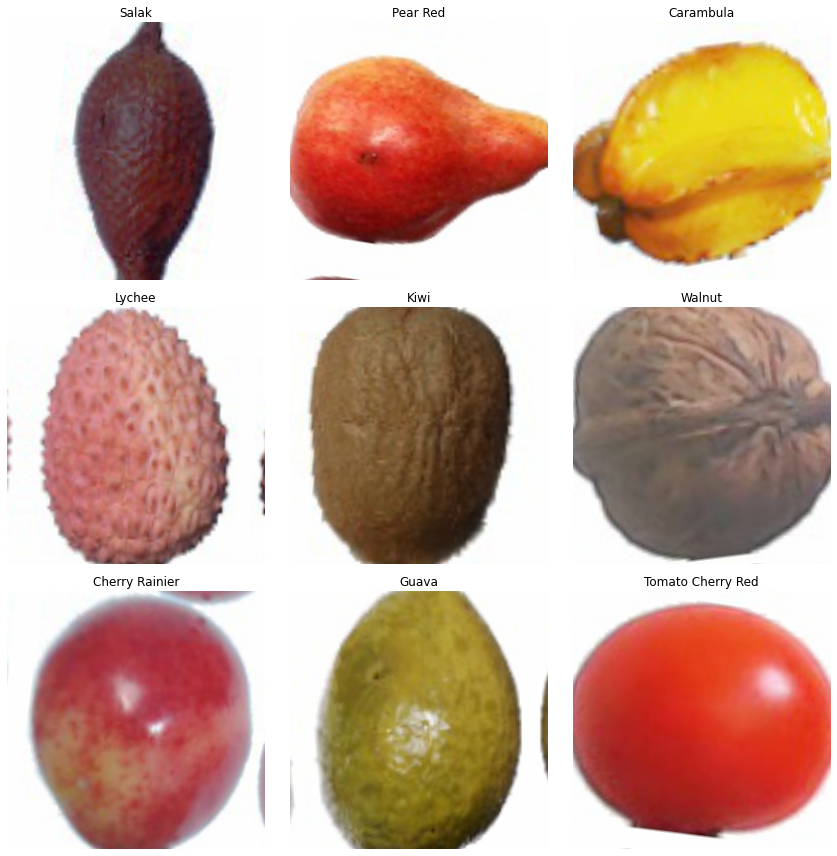

In [28]:
data.show_batch(rows=3,fig_size=(5,5))

In [29]:
len(data.classes)

114

In [30]:
 data.c, len(data.train_ds), len(data.valid_ds), len(data.test_ds)

(114, 45912, 11477, 19587)

Loading ResNet-18 and setting the metrics to improve as accuracy. We also have set the call back function which helps us in plotting the train and validation loss while fitting the model.

In [31]:
learner18=cnn_learner(data,models.resnet18,metrics=accuracy, callback_fns=ShowGraph)

Finding the best learning rate for the model so that the loss is reduced to increase the precision of the model.

In [32]:
learner18.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Plotting the learning rate with a suggestion where there is a significant imprivement in the loss.

Min numerical gradient: 5.25E-03
Min loss divided by 10: 3.02E-02


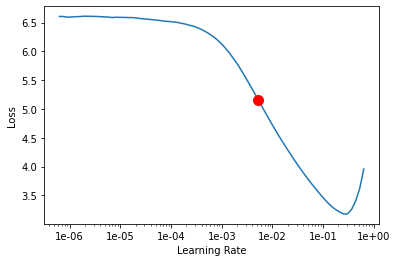

In [33]:
learner18.recorder.plot(suggestion=True)

Fitting our ResNet-18 Model for 4 epochs with the max learning rate set to the best as found in the previous graph.

epoch,train_loss,valid_loss,accuracy,time
0,0.865425,0.015034,0.998083,06:29
1,0.179444,0.005444,0.999564,06:53


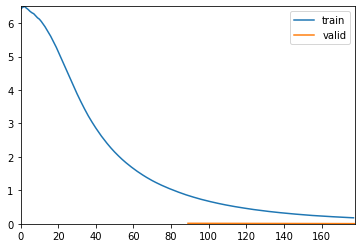

In [34]:
learner18.fit_one_cycle(2)

Initially the model is freezed and only the last few layers are trained. We unfreeze the layers and train on all the layers to have improvement in the error rate.

epoch,train_loss,valid_loss,accuracy,time
0,0.045282,0.002966,0.999913,07:05
1,0.035835,0.002465,0.999913,07:13


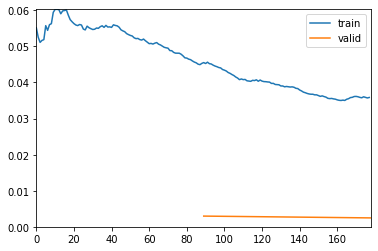

In [36]:
learner18.unfreeze()
learner18.fit_one_cycle(2,max_lr=slice(1e-6,1e-4))
learner18.save('learn-stage7')

Printing the summary of the model for better understanding.

In [37]:
learner18.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 128, 128]       9,408      True      
______________________________________________________________________
BatchNorm2d          [64, 128, 128]       128        True      
______________________________________________________________________
ReLU                 [64, 128, 128]       0          False     
______________________________________________________________________
MaxPool2d            [64, 64, 64]         0          False     
______________________________________________________________________
Conv2d               [64, 64, 64]         36,864     True      
______________________________________________________________________
BatchNorm2d          [64, 64, 64]         128        True      
______________________________________________________________________
ReLU                 [64, 64, 64]         0          False     
___________________________________________________

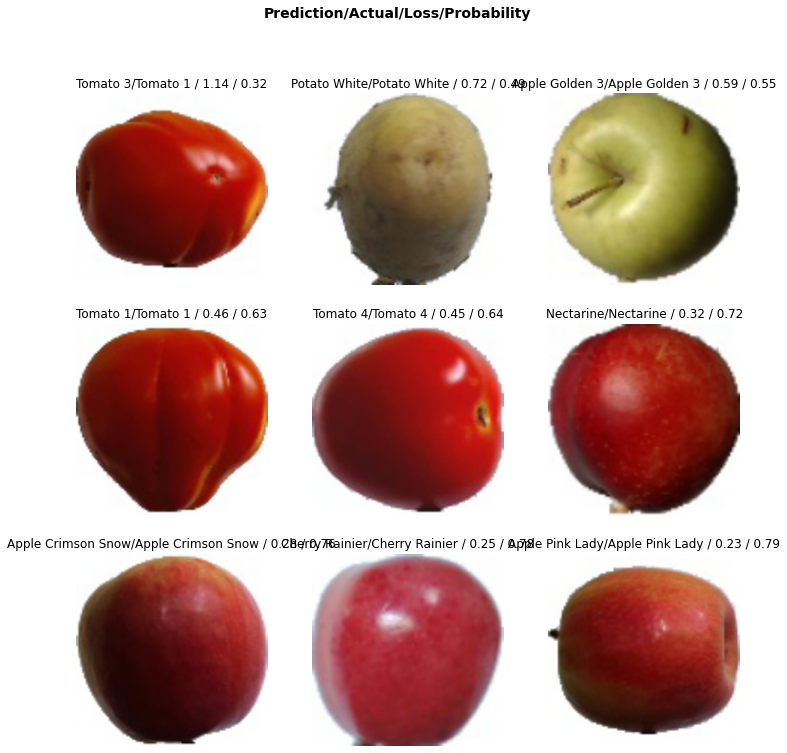

In [38]:
interp=ClassificationInterpretation.from_learner(learner18)
interp.plot_top_losses(9,figsize=(12,12))

# Confusion Matrix on the Validation set.

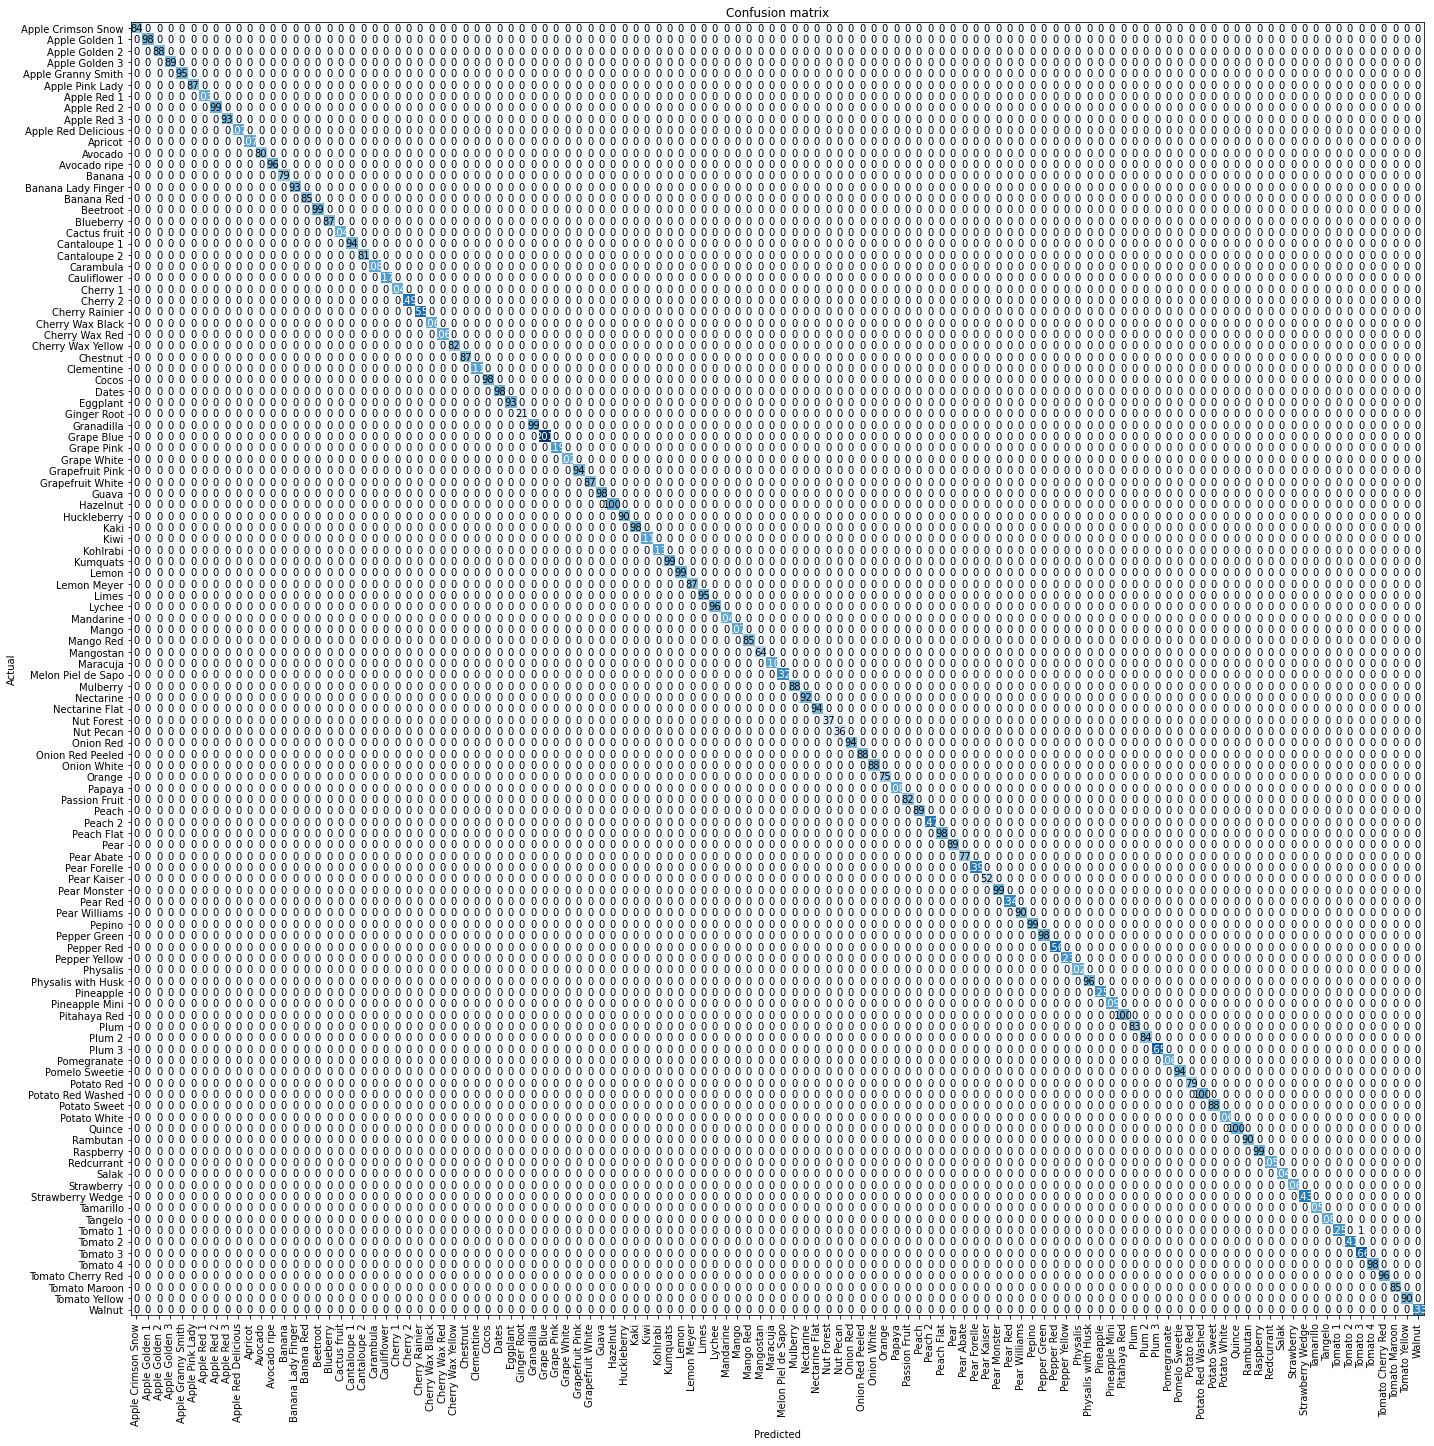

In [39]:
interp.plot_confusion_matrix(figsize=(20,20))


# **Accuracy on Validation data.**

In [40]:
learner18.validate()

[0.002465011, tensor(0.9999)]

In [41]:
learner18.data

ImageDataBunch;

Train: LabelList (45912 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Tomato 3,Tomato 3,Tomato 3,Tomato 3,Tomato 3
Path: /tmp/fruits-360_dataset/fruits-360;

Valid: LabelList (11477 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Mulberry,Apple Red 2,Papaya,Mulberry,Banana
Path: /tmp/fruits-360_dataset/fruits-360;

Test: LabelList (19587 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: EmptyLabelList
,,,,
Path: /tmp/fruits-360_dataset/fruits-360

In [ ]:
learner18.validate(data.test_dl)

# Preparation on changing the validation set of the model to the test data.
This is done as fastai supports unlabelled data in the test data as of now and validating the data manually would be cumbersome task when the data is already labelled and provided in a particular format.
We basically create a new ImageDataBunch having the Test data in it and set the same parameters as our data in the previous step while feeding it to our model. Then we pass this new data to the original model's validation set and then validate and create a ClassificationInterpretation to have the confusion matrix and other results this time on the test data set which is never seen by the model.

In [ ]:
learn=learner18

In [ ]:
learn.data

In [ ]:
il = ImageList.from_folder(path=test_folder)
ils = il.split_none() 
ll = ils.label_from_folder()
ll.valid = ll.train
ll.transform(tfms=None,size=256) 
data2 = ll.databunch(bs=512);
data2.normalize(imagenet_stats)


In [ ]:
learn.data.valid_dl = data2.valid_dl

In [ ]:
learn.data

# Confusion matrix on the Test Data.

In [ ]:
interp = ClassificationInterpretation.from_learner(learn,ds_type=DatasetType.Valid)
interp.plot_confusion_matrix(figsize=(20,20))

# Accuracy on the Test Data

In [ ]:
interp.plot_top_losses(9,figsize=(14,14))

In [ ]:
learn.validate()